<a href="https://colab.research.google.com/github/PuchToTalk/Ladybug_project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import chi2_contingency


import numpy as np
from PIL import Image
import os
import cv2

In [5]:
cocci = pd.read_csv("training_labels.csv")
cocci

,Image_id,Label
0,im-001,0
1,im-002,0
2,im-003,1
3,im-004,1
4,im-005,1
...,...,...
195,im-196,0
196,im-197,1
197,im-198,0
198,im-199,1


In [6]:
train_labels = cocci['Label']

In [7]:
image_ini = []
image_gris = []

im_size = 124

for k in range(1, 201):
    try:
        image_ini.append(np.array(Image.open(fr"im-{k:03}_im.png").convert("RGB").resize((im_size, im_size))))
        image_gris.append(np.array(Image.open(fr"im-{k:03}_seg.png").convert("L").resize((im_size, im_size))))
    except(IOError, OSError):
        pass


In [8]:
image_ini = np.asarray(image_ini)
image_gris = np.asarray(image_gris)


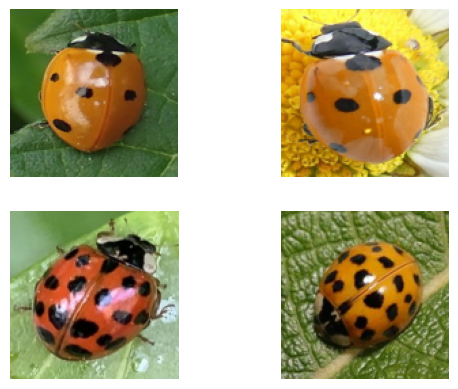

In [9]:
for k in range(4):
    ax = plt.subplot(2, 2, k+1)
    plt.imshow(image_ini[k])
    plt.axis("off")
plt.show()

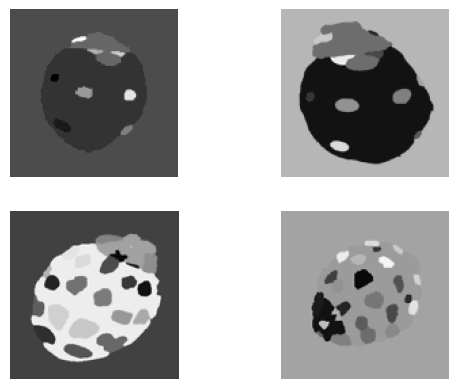

In [10]:
for k in range(4):
    ax = plt.subplot(2,2, k+1)
    plt.imshow(image_gris[k], cmap ="gray")
    plt.axis("off")
plt.show()

In [11]:
image_ini = image_ini / 255
image_ini = image_ini.astype('float32')
image_gris = image_gris / 255
image_gris = image_gris.astype('float32')

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(32, (4,4), activation = 'relu', input_shape = (im_size, im_size, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 121, 121, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6

In [13]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer ="adam",
    metrics = ["accuracy"]
    
)

In [15]:
history = model.fit(image_ini, train_labels, epochs = 30, validation_split = 0.3, batch_size = 30, verbose =1)

Epoch 1/30
5/5 [==============================] - 1s 110ms/step - loss: 9.8970e-04 - accuracy: 1.0000 - val_loss: 1.2887 - val_accuracy: 0.6833
Epoch 2/30
5/5 [==============================] - 0s 53ms/step - loss: 8.9407e-04 - accuracy: 1.0000 - val_loss: 1.3051 - val_accuracy: 0.6833
Epoch 3/30
5/5 [==============================] - 0s 53ms/step - loss: 8.0590e-04 - accuracy: 1.0000 - val_loss: 1.3180 - val_accuracy: 0.7000
Epoch 4/30
5/5 [==============================] - 0s 45ms/step - loss: 7.4853e-04 - accuracy: 1.0000 - val_loss: 1.3222 - val_accuracy: 0.7000
Epoch 5/30
5/5 [==============================] - 0s 37ms/step - loss: 6.9106e-04 - accuracy: 1.0000 - val_loss: 1.3376 - val_accuracy: 0.7000
Epoch 6/30
5/5 [==============================] - 0s 42ms/step - loss: 6.4881e-04 - accuracy: 1.0000 - val_loss: 1.3472 - val_accuracy: 0.7000
Epoch 7/30
5/5 [==============================] - 0s 37ms/step - loss: 6.0672e-04 - accuracy: 1.0000 - val_loss: 1.3626 - val_accuracy: 0.700

In [21]:
check = model.predict(image_ini)
df_check = pd.DataFrame(check)
df_check[0] = df_check[0].apply(lambda x : x * 100)
df_check[1] = df_check[1].apply(lambda x : x * 100)
df_check.rename(columns={ df_check.columns[0]: "Coccinella septempunctata ( % )" }, inplace = True)
df_check.rename(columns={ df_check.columns[1]: "Harmonia axyridis ( % )" }, inplace = True)


7/7 [==============================] - 0s 7ms/step


In [22]:
df_check

,Coccinella septempunctata ( % ),Harmonia axyridis ( % )
0,99.904805,0.095198
1,99.994159,0.005843
2,0.003332,99.996674
3,0.012917,99.987078
4,0.002221,99.997783
...,...,...
195,99.960452,0.039551
196,92.412621,7.587372
197,79.743695,20.256302
198,99.982977,0.017025
